<a href="https://www.kaggle.com/code/bhavsarshivani/customer-clustering-with-hierarchical-part-1?scriptVersionId=111045548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div align="center" style="color:white;
           background-color:#0D5784;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Clustering with Hierarchical , K-Means , DBSCAN </center>
<p style="padding: 5px;color:white;"> 
    </p> 
</div> 

<div align="center" style="color:white;
           background-color:#852332FF;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> PART 1 : Clustering with Hierarchical  </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div> 

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> DATA : Segmentation </center>
<p style="padding: 5px;color:white;"> 
    </p>   
</div> 

In [2]:
df = pd.read_csv("../input/customer-clustering/segmentation data.csv",index_col=0)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


* Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

* You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Data Description:
-----

>The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										


### Data dictionary:

ID

* numerical
* unique identifier of each customer

Sex

* categrical
* 0: male, 1: female

Marital status

* categorical
* 0: single, 1: non-single (divorced, separated, married, widowed)

Age

* numerical
* age in years

Education

* categorical
* 0: other/unknown, 1: high school, 2: university, 3: graduate school

Income

* numerical
* annual income in USD
* Occupation

categorical

* 0: unemployed/unskilled,
* 1: skilled employee/official, 
* 2: management/self-employed/highly qualified employed/officer

Settlement size

* categorical
* 0: small city, 1: mid-sized city, 2: big city

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> EDA  </center>
<p style="padding: 5px;color:white;"> 
    </p>  
</div> 

In [5]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
for i in df.columns:
    print(i, '\n', df[i].value_counts(),'\n', '\n')

Sex 
 0    1086
1     914
Name: Sex, dtype: int64 
 

Marital status 
 0    1007
1     993
Name: Marital status, dtype: int64 
 

Age 
 26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
29     70
30     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
41     33
43     33
45     31
44     30
49     29
48     29
47     26
50     23
20     23
57     20
52     19
51     19
54     17
53     16
63     15
64     14
60     13
61     13
65     12
58     12
55     10
67     10
56     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
70      3
73      3
18      3
75      2
72      1
76      1
Name: Age, dtype: int64 
 

Education 
 1    1386
2     291
0     287
3      36
Name: Education, dtype: int64 
 

Income 
 83687     2
113619    2
126906    2
120262    2
214364    2
         ..
121400    1
90051     1
111862    1
162772    1
68416     1
Name: Income, Length: 1982, d

In [7]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Sex: [0 1]
Marital status: [0 1]
Age: [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59 73 72 76 71 18]
Education: [2 1 0 3]
Income: [124670 150773  89210 ...  86400  97968  68416]
Occupation: [1 0 2]
Settlement size: [2 0 1]


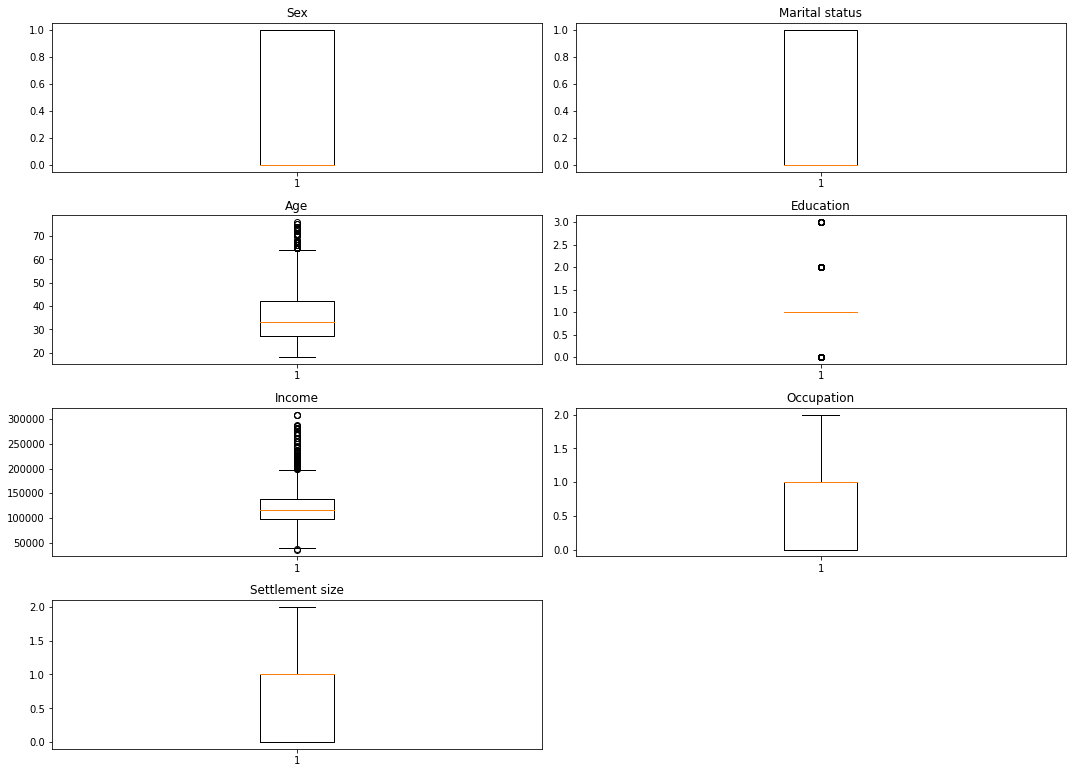

In [8]:
plt.figure(figsize=(15,40))
for i,j in enumerate(df.columns):
  plt.subplot(15,2,i+1)
  plt.boxplot(df[j])
  plt.title(j)
  plt.tight_layout()

In [9]:
df[df.duplicated()].count()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [10]:
cat_cols = ["Sex", "Marital status", "Education", "Occupation", "Settlement size"]

# convert to string for now as it eases EDA
df[cat_cols] = df[cat_cols].astype(str)
df[cat_cols]

,Sex,Marital status,Education,Occupation,Settlement size
ID,,,,,
100000001,0,0,2,1,2
100000002,1,1,1,1,2
100000003,0,0,1,0,0
100000004,0,0,1,1,1
100000005,0,0,1,1,1
...,...,...,...,...,...
100001996,1,0,1,0,0
100001997,1,1,1,1,0
100001998,0,0,0,0,0


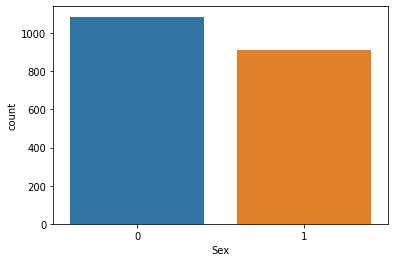

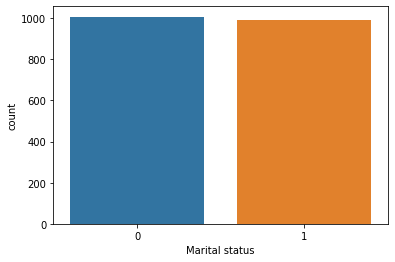

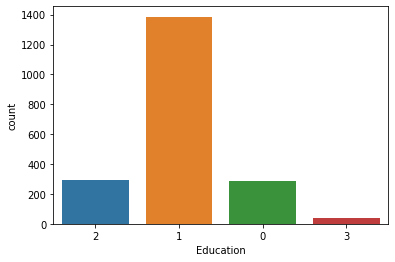

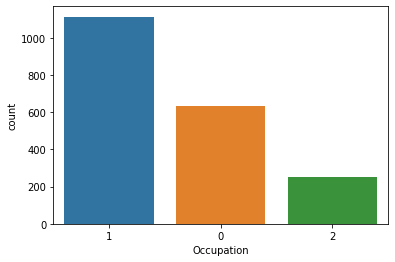

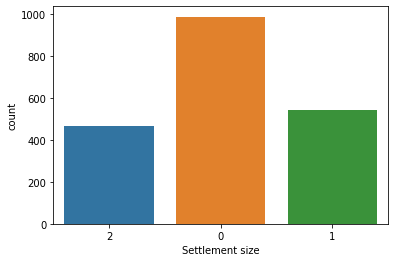

In [11]:
for col in cat_cols:
    fig, axs = plt.subplots()
    sns.countplot(data=df, x=col)
    plt.show()

In [12]:
# convert categorical columns back from string to integer

df[cat_cols] = df[cat_cols].astype(int)

In [13]:
num_col = ["Age", "Income"]

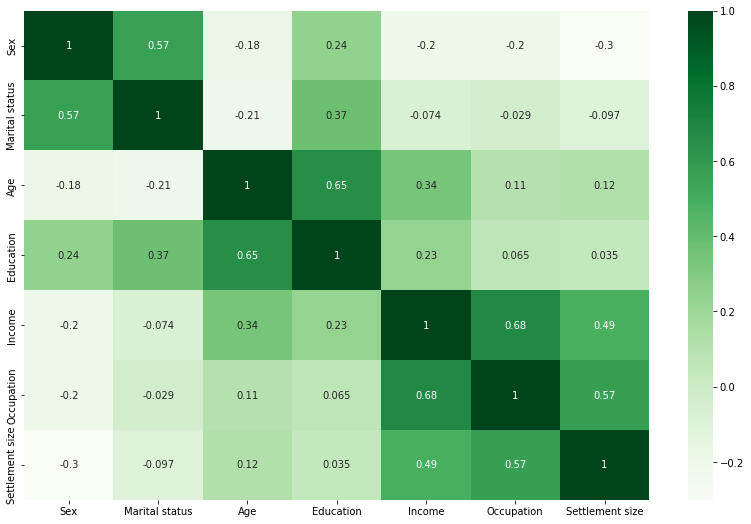

In [14]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Greens')
plt.show()

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Clustering  </center>
<p style="padding: 5px;color:white;"> 
    </p>   
</div> 


### 1. Supervised learning : 
>when we are given a target variable which we have to predict based on a given set of independent variables, such problems are called supervised learning problems.

### 2. UnSupervised learning : 
>There might be situations when we do not have any dependent variable to predict. Such problems, without any explicit dependent variable, are known as unsupervised learning problems.

>In such situation we try to divide the entire data into a set of groups. These groups are known as clusters and the process of making these clusters is known as clustering.

>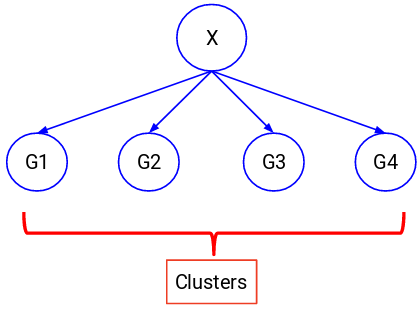

>There are a LOT more applications of unsupervised learning , Here we discuss about clustering

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center>  Hierarchical Clustering with agglomerative Method  </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div>
    
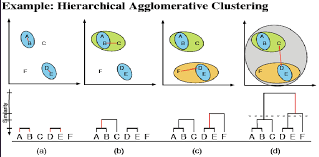

In [15]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [16]:
data = df.copy()

In [17]:
d = preprocessing.normalize(data)
data_norm = pd.DataFrame(d ,columns=data.columns)
data_norm.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.000000,0.000000,0.000537,0.000016,1.0,0.000008,0.000016
1,0.000007,0.000007,0.000146,0.000007,1.0,0.000007,0.000013
2,0.000000,0.000000,0.000549,0.000011,1.0,0.000000,0.000000
3,0.000000,0.000000,0.000262,0.000006,1.0,0.000006,0.000006
4,0.000000,0.000000,0.000356,0.000007,1.0,0.000007,0.000007


In [18]:
data_norm.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,0.000004,0.000005,0.000316,0.000009,9.999999e-01,0.000006,0.000006
std,0.000005,0.000005,0.000121,0.000006,5.190770e-08,0.000005,0.000006
min,0.000000,0.000000,0.000093,0.000000,9.999995e-01,0.000000,0.000000
25%,0.000000,0.000000,0.000231,0.000007,9.999999e-01,0.000000,0.000000
50%,0.000000,0.000000,0.000292,0.000009,1.000000e+00,0.000008,0.000004
75%,0.000009,0.000009,0.000377,0.000011,1.000000e+00,0.000009,0.000010
max,0.000028,0.000028,0.001041,0.000043,1.000000e+00,0.000022,0.000029


<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Difference ways to measure the distance  </center>
<p style="padding: 5px;color:white;"> 
    </p>   
</div>  

### 1.Euclidean Distance: The square root of the sum of the square differences.

>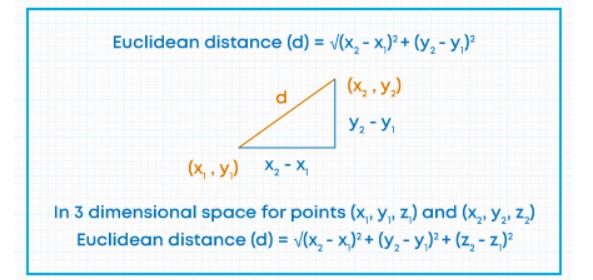

### 2.Manhattan Distance: The sum of absolute differences.

>Euclidean distance may not be suitable while measuring the distance between different locations. If we wanted to measure a distance between two retail stores in a city, then Manhattan distance will be more suitable to use, instead of Euclidean distance.

>The Manhattan distance between two vectors, A and B, is calculated as:

>Σ|Ai – Bi| 

>where i is the ith element in each vector. This distance is used to measure the dissimilarity between two vectors and is commonly used in many machine learning algorithms.
>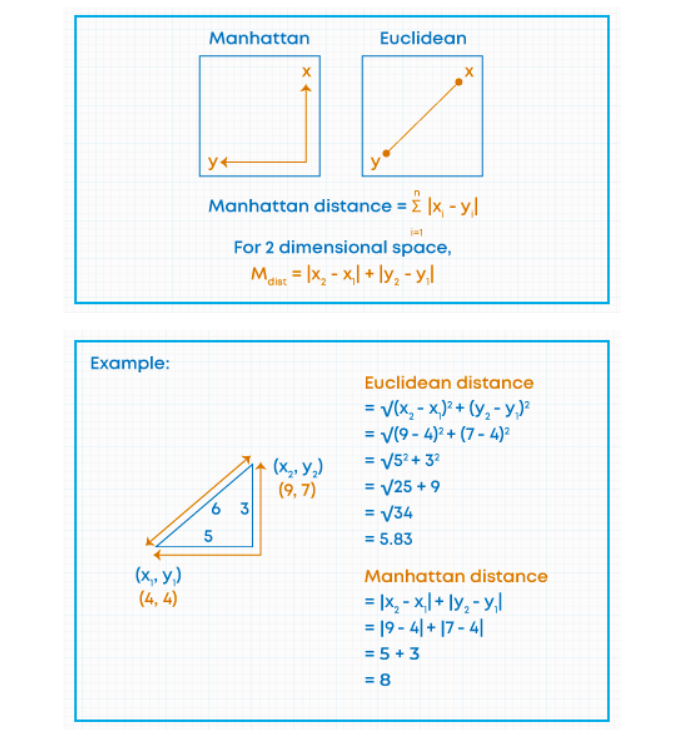

### 3.Cosine Similarity  :

>Cosine similarity ranges from 0 to 1, where 1 means the two vectors are perfectly similar.
>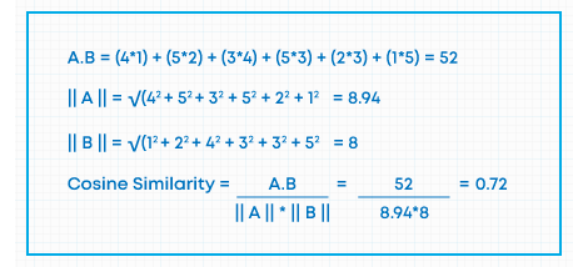

>Cosine similarity cares only about the angle between the two vectors and not the distance between them.

>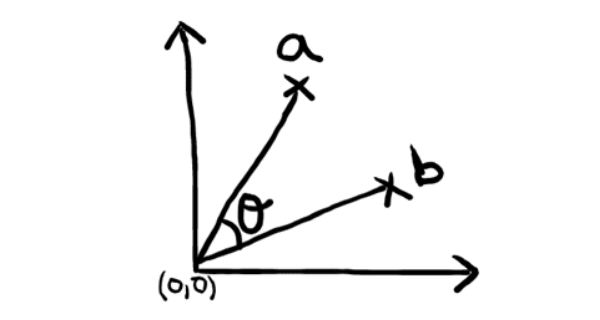

>Assume there’s another vector c in the direction of b.

>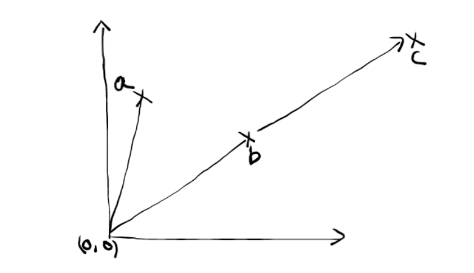

>The cosine similarity between b and c is 1 since the angle between b and c is 0 and cos(0) = 1.

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center>  Difference ways to measure the distance between two clusters 
 </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div> 
    
* Method 1 : Single-linkage (The closest point in each cluster)

* Method 2 : Centroid (The average of each cluster)

* Method 3 : Complete-linkage (The furthest point in each cluster)

* Methos 4 : Ward's linkage

## Method 1 : Single-linkage (The closest point in each cluster)

> In single-link (or single linkage) hierarchical clustering, we merge in each step the two clusters whose two closest members have the smallest distance (or: the two clusters with the smallest minimum pairwise distance)

>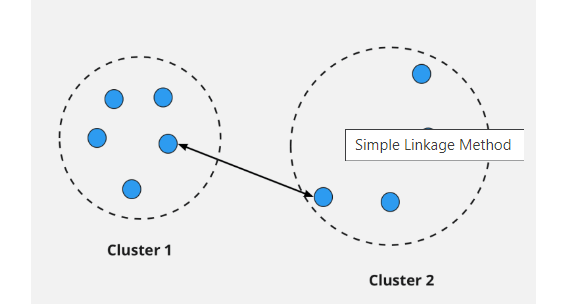

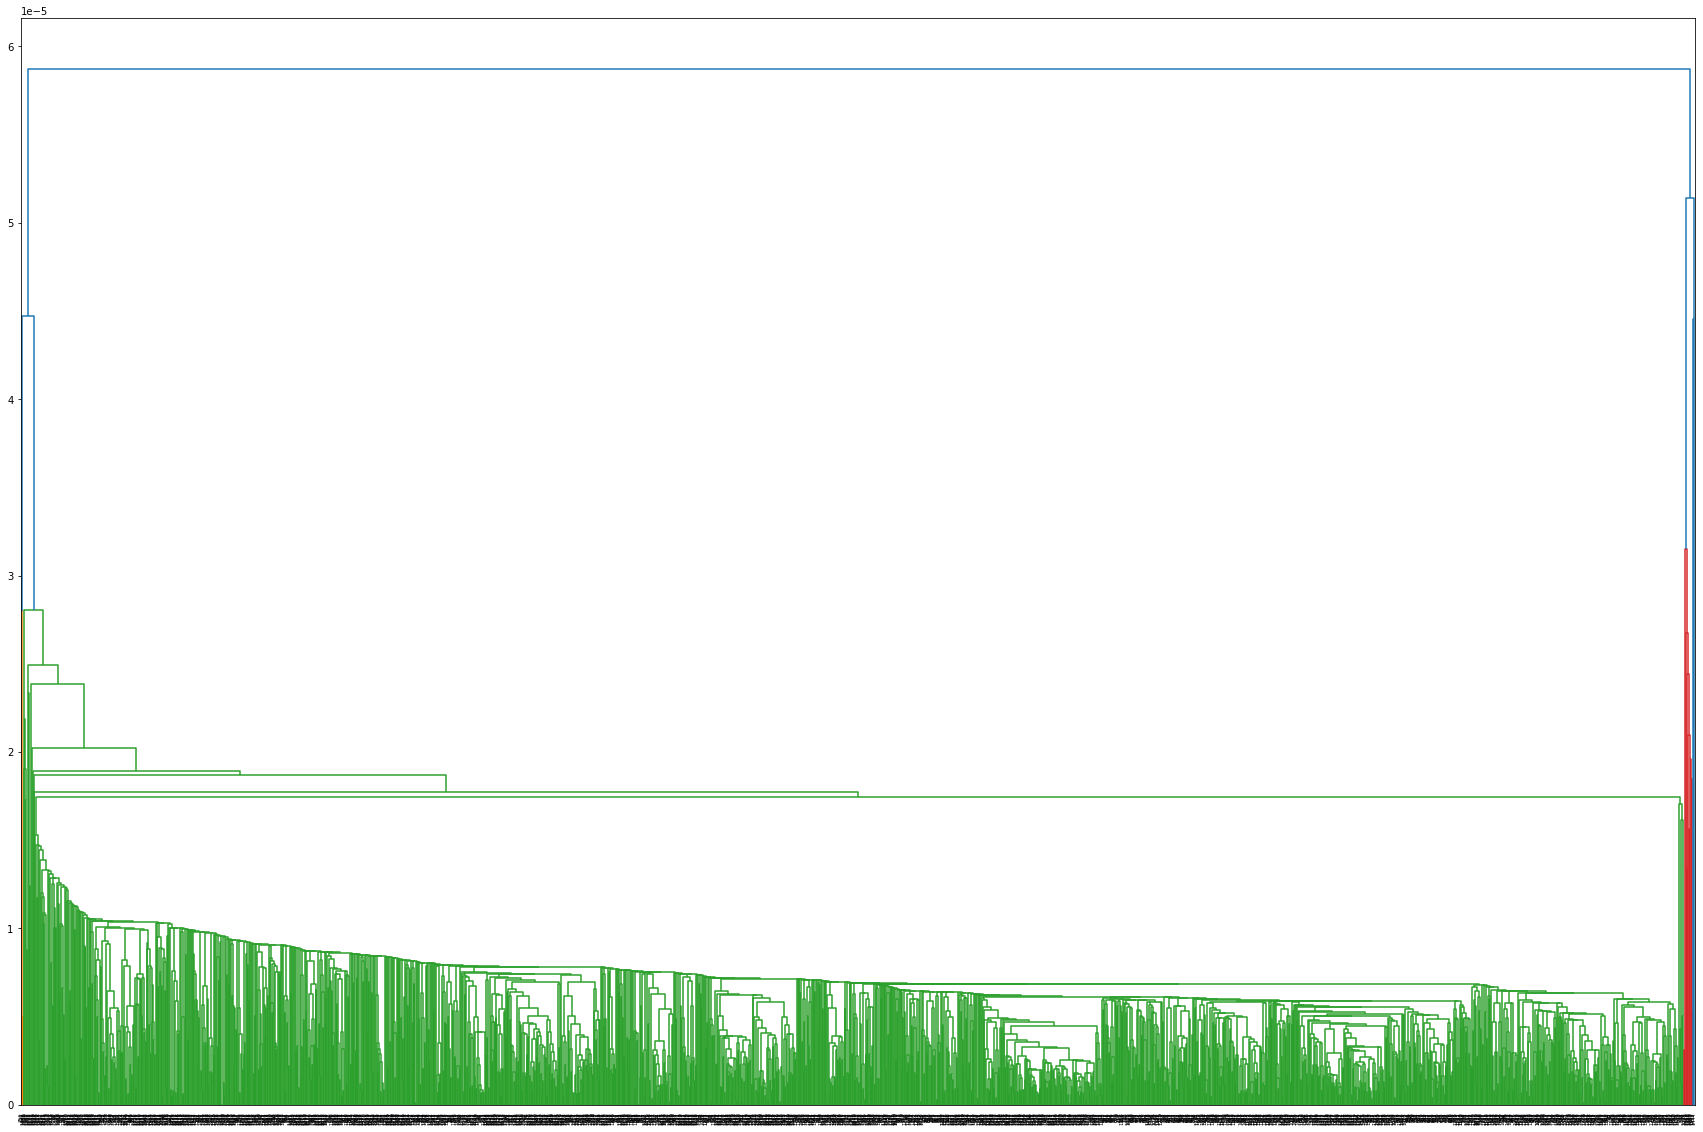

In [19]:
plt.figure(figsize=(30,20))
dendrogram1 = sch.dendrogram(sch.linkage(data_norm, method='single'))

* Seeing at the dendogram we can select number of clusters as 4

In [20]:
hc1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "single")
hc1.fit(data_norm)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [21]:
#saving the clusters 
y_hc1 = hc1.fit_predict(data_norm)
y_hc1

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
#adding the clusters to the dataframe
data['cluster_hc'] = y_hc1
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_hc
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,1
100000005,0,0,53,1,149031,1,1,1


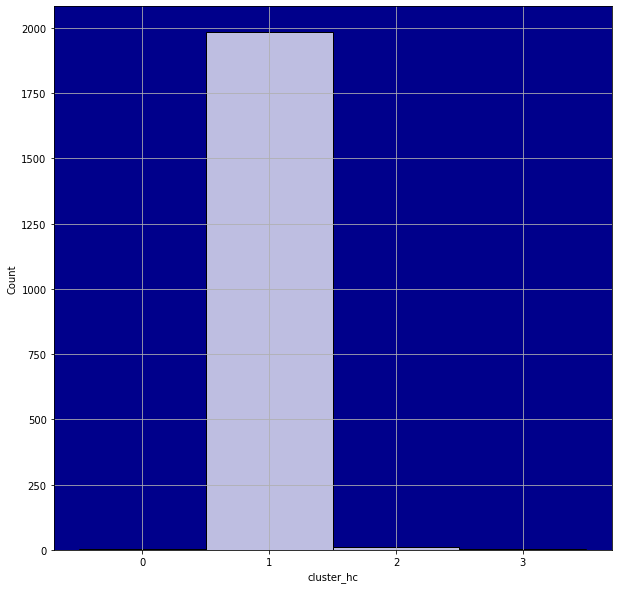

In [23]:
data['cluster_hc'] = y_hc1
data.cluster_hc = data.cluster_hc.astype(str)
data = data.sort_values("cluster_hc")

plt.figure(figsize=(10,10))
plt.axes(facecolor='darkblue')
sns.histplot(data.cluster_hc, color = "white")
plt.grid()
plt.show()

The silhouette coefficient is a measure of cluster compatibility and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

* How close the data point is to other points in the cluster

* How far away the data point is from points in other clusters

>Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than to other clusters.

In [24]:
score1 = silhouette_score(data_norm, hc1.labels_, random_state=0)
score1

0.7298933216029826

* 0.7298 indicate that samples are closer to their clusters than they are to other clusters.

In [25]:
#number of datapoints for each clusters
data['cluster_hc'].value_counts()

1    1984
2      11
3       3
0       2
Name: cluster_hc, dtype: int64

In [26]:
df1_clustered1 = data.sort_values("cluster_hc")
df1_clustered1.iloc[:,[-1]]

,cluster_hc
ID,
100001433,0
100001445,0
100000003,1
100000004,1
100000005,1
...,...
100000188,2
100001076,2
100000757,3


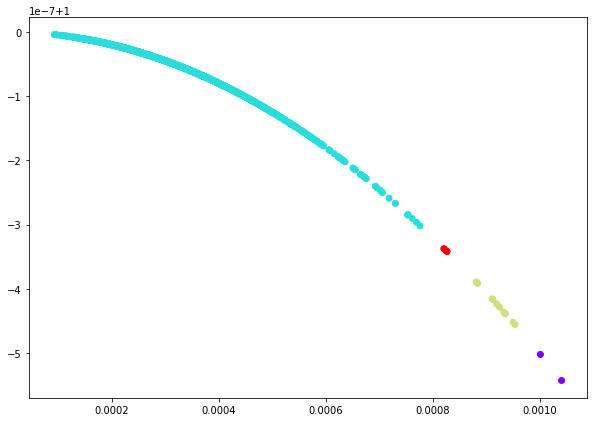

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(data_norm['Age'],data_norm['Income'],c=hc1.labels_,cmap='rainbow')

## Pros of Single Linkage :

* Single Linkage methods can handle non-elliptical shapes.
* Single Linkage algorithms are the best for capturing clusters of different sizes.

## Cons of Single Linkage:

* Simple Linkage methods are sensitive to noise and outliers.
* That means Simple Linkage methods can not group clusters properly if there is any noise between the clusters.


## Method 2 : Centroid (The average of each cluster)

> In the Centroid Linkage approach, the distance between the two sets or clusters is the distance between two mean vectors of the sets (clusters).

>At each stage, we combine the two sets that have the smallest centroid distance. In simple words, it is the distance between the centroids of the two sets.

>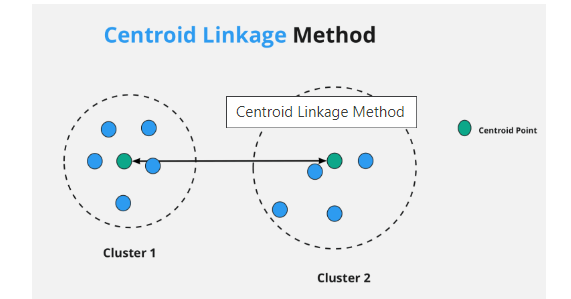

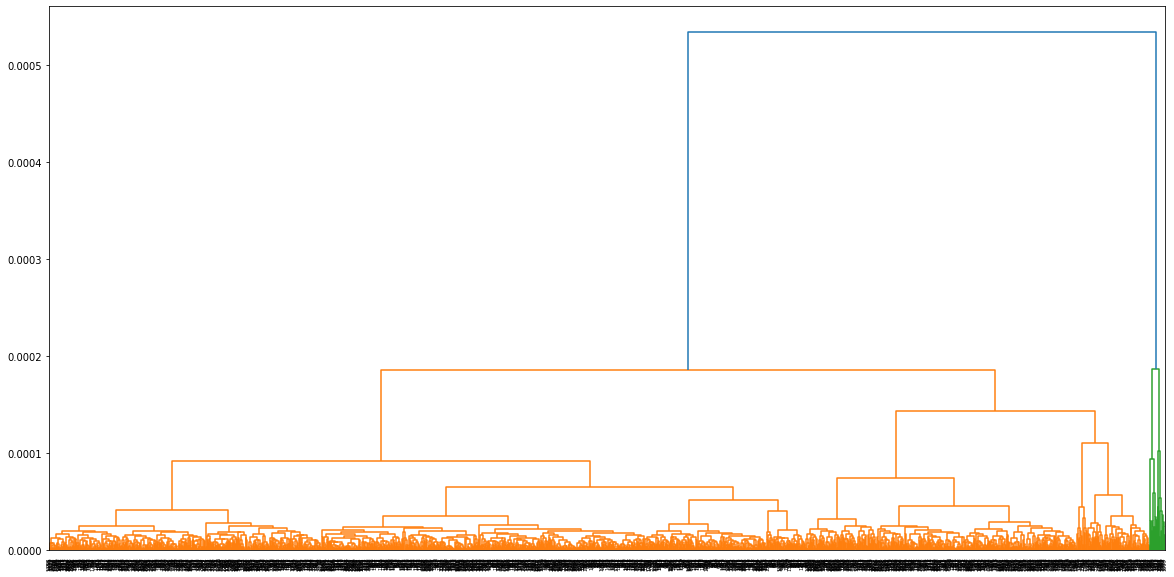

In [28]:
plt.figure(figsize=(20,10))
dendrogram2 = sch.dendrogram(sch.linkage(data_norm, method='average'))

* Seeing at the dendogram we can select number of clusters as 4

In [29]:
#create cluster
hc2 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "average")
hc2.fit(data_norm)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [30]:
#saving the clusters
y_hc2 = hc2.fit_predict(data_norm)
y_hc2

array([0, 3, 0, ..., 0, 3, 0])

In [31]:
#adding the clusters to the dataframe
data['cluster_hc2'] = y_hc2
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_hc,cluster_hc2
ID,,,,,,,,,
100001433,1,0,70,3,69915,0,0,0,0
100001445,1,1,54,2,51882,0,0,0,3
100000001,0,0,67,2,124670,1,2,1,0
100001337,1,1,32,1,121428,1,0,1,3
100001336,1,1,40,1,124001,0,0,1,0


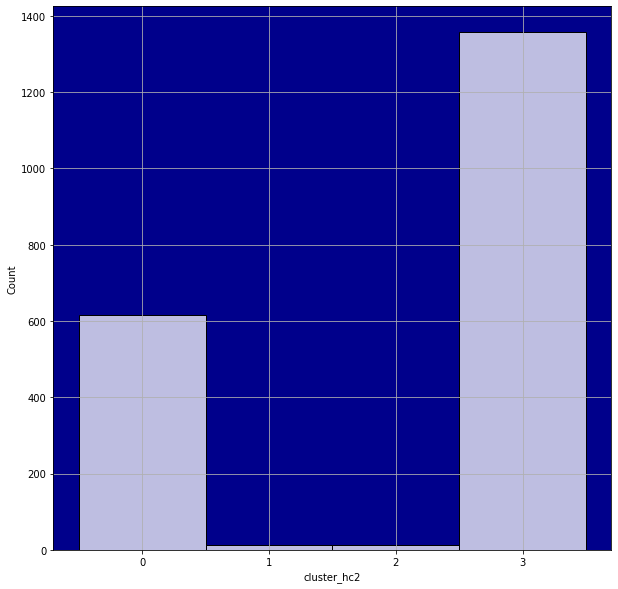

In [32]:
data['cluster_hc2'] = y_hc2
data.cluster_hc2 = data.cluster_hc2.astype(str)
data = data.sort_values("cluster_hc2")

plt.figure(figsize=(10,10))
plt.axes(facecolor='darkblue')
sns.histplot(data.cluster_hc2, color = "white")
plt.grid()
plt.show()

In [33]:
score2 = silhouette_score(data_norm, hc2.labels_, random_state=0)
score2

0.5745688892593166

* 0.5745 indicate that samples are closer to their clusters than they are to other clusters, Score is lower than the 1st method.

In [34]:
#number of datapoints for each clusters
data["cluster_hc2"].value_counts()

3    1357
0     616
2      14
1      13
Name: cluster_hc2, dtype: int64

In [35]:
df2_clustered1 = data.sort_values("cluster_hc2")
df2_clustered1.iloc[:,[-1]]

,cluster_hc2
ID,
100001433,0
100000191,0
100000190,0
100000239,0
100000234,0
...,...
100000652,3
100000721,3
100000651,3


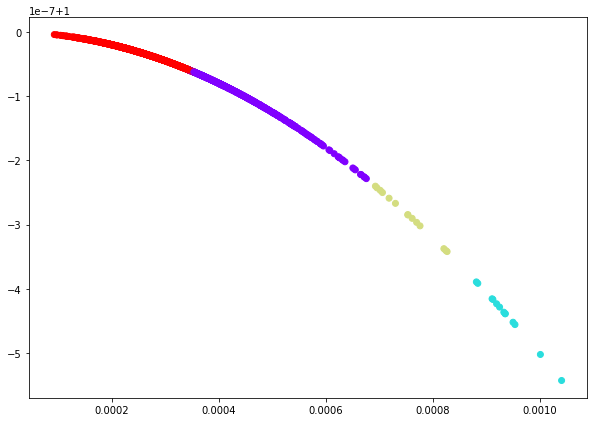

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(data_norm['Age'],data_norm['Income'],c=hc2.labels_,cmap='rainbow')

## Pros of Centroid Linkage :

* The Centroid Linkage method also does well in separating clusters if there is any noise between the clusters.

## Cons of Centroid Linkage :

* Similar to Complete Linkage methods, the Centroid Linkage method is also biased towards globular[round] clusters.

## Method 3 : Complete-linkage (The furthest point in each cluster)

> The complete linkage method is a hierarchical classification method where the distance between two classes is defined as the greatest distance that could be obtained if we select one element from each class and measure the distance between these elements.

>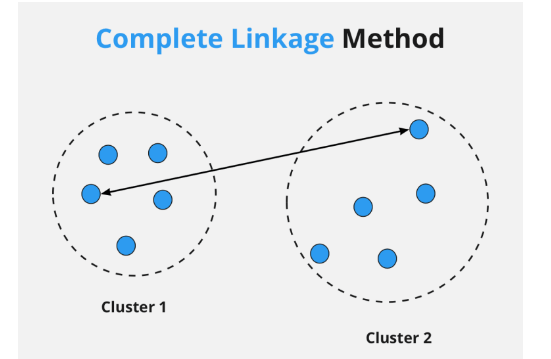

>The complete Linkage method is also known as the Maximum Linkage (MAX) method. 

>In the Complete Linkage technique, the distance between two clusters is defined as the maximum distance between an object (point) in one cluster and an object (point) in the other cluster.

>And this method is also known as the furthest neighbor method.


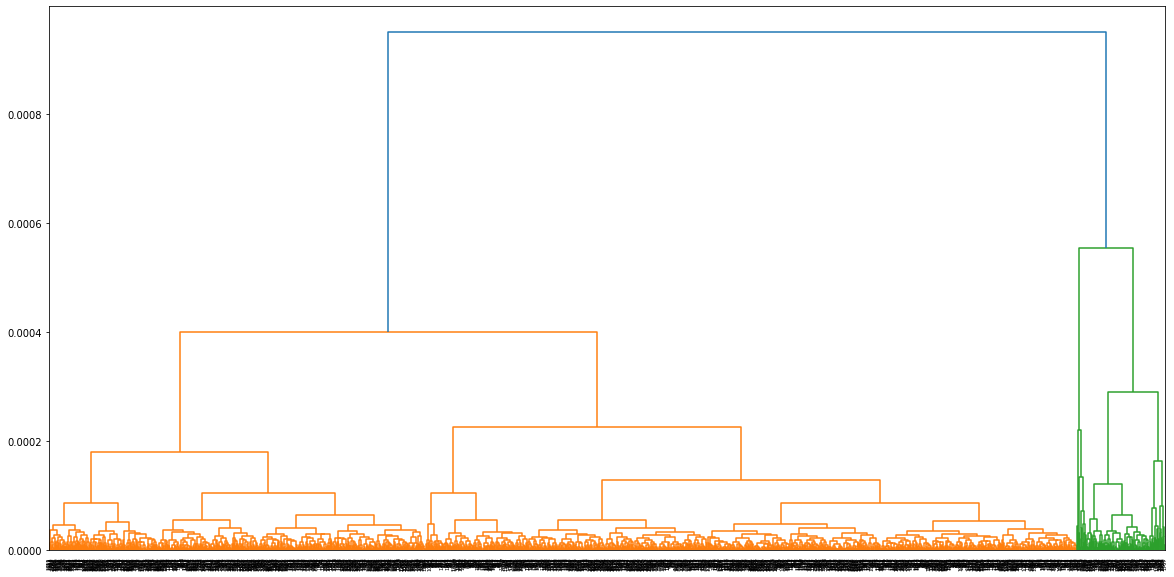

In [37]:
plt.figure(figsize=(20,10))
dendrogram3 = sch.dendrogram(sch.linkage(data_norm, method='complete'))

 * Seeing at the dendogram we can select number of clusters as 3

In [38]:
#create cluster
hc3 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
hc3.fit(data_norm)
hc3.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [39]:
#saving the clusters
y_hc3 = hc3.fit_predict(data_norm)
print(y_hc2)

[0 3 0 ... 0 3 0]


In [40]:
#adding the clusters to the dataframe
data['cluster_hc3'] = y_hc3
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_hc,cluster_hc2,cluster_hc3
ID,,,,,,,,,,
100001433,1,0,70,3,69915,0,0,0,0,1
100000275,0,1,34,1,175367,0,0,1,0,0
100000274,0,0,28,0,120712,1,1,1,0,1
100000272,1,1,37,1,137069,1,1,1,0,0
100000267,0,0,36,1,149237,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
100001042,1,1,61,2,308529,2,2,1,3,0
100000330,0,0,28,0,101589,1,2,1,3,0
100001041,1,1,64,2,153645,1,2,1,3,0


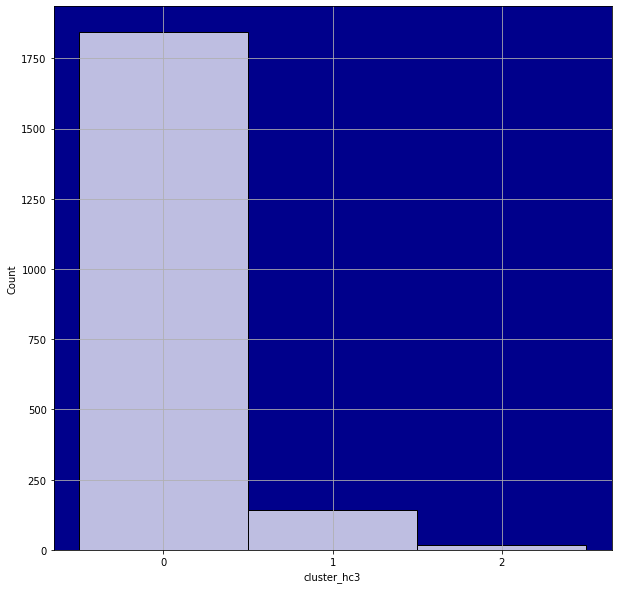

In [41]:
data['cluster_hc3'] = y_hc3
data.cluster_hc3 = data.cluster_hc3.astype(str)
data = data.sort_values("cluster_hc3")

plt.figure(figsize=(10,10))
plt.axes(facecolor='darkblue')
sns.histplot(data.cluster_hc3, color = "white")
plt.grid()
plt.show()

In [42]:
score3 = silhouette_score(data_norm, hc3.labels_, random_state=0)
score3

0.5771358025964975

* 0.5771 indicate that samples are closer to their clusters than they are to other clusters. It's same as compare to method 1 and higher than the method 2.

In [43]:
#number of datapoints for each clusters
data['cluster_hc3'].value_counts()

0    1843
1     141
2      16
Name: cluster_hc3, dtype: int64

In [44]:
df_clustered1 = data.sort_values("cluster_hc3").iloc[:,[-1]]
df_clustered1

,cluster_hc3
ID,
100001267,0
100000427,0
100000423,0
100000411,0
100000091,0
...,...
100001210,2
100000610,2
100001515,2


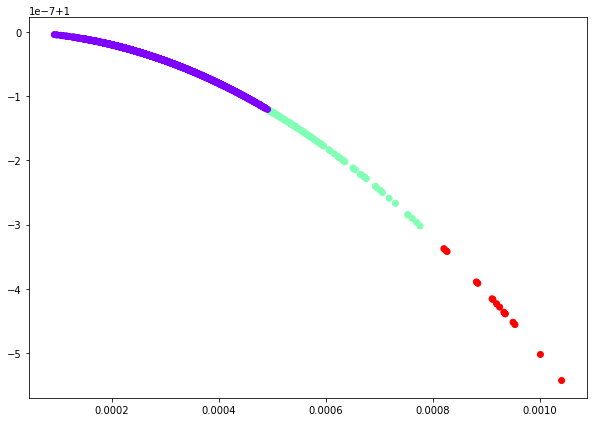

In [45]:
plt.figure(figsize=(10,7))
plt.scatter(data_norm['Age'],data_norm['Income'],c=hc3.labels_,cmap='rainbow')

## Pros of Complete Linkage :

* Complete Linkage algorithms are less sensitive to noise and outliers.
* That means the Complete Linkage method also does well in separating clusters if there is any noise between the clusters.

## Cons of Complete Linkage :

* Complete linkage methods tend to break large clusters.
* Complete Linkage is biased towards globular[round] clusters.

## Method 4 : Ward's-linkage 

> 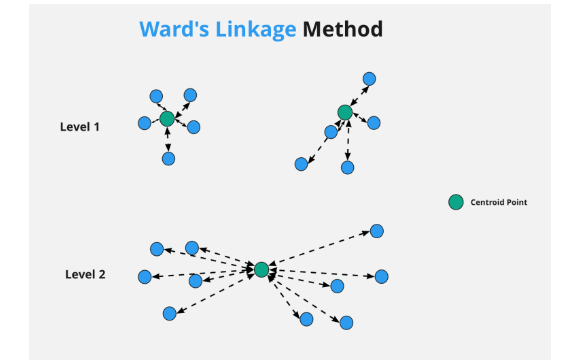

>Ward's Linkage method is the similarity of two clusters. Which is based on the increase in squared error when two clusters are merged, and it is  similar to the group average if the distance between points is distance squared.

>In other words,Ward’s method says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them into a single cluster.

>Instead of measuring the distance directly, it analyzes the variance of clusters. Ward’s is said to be the most suitable method for quantitative variables.


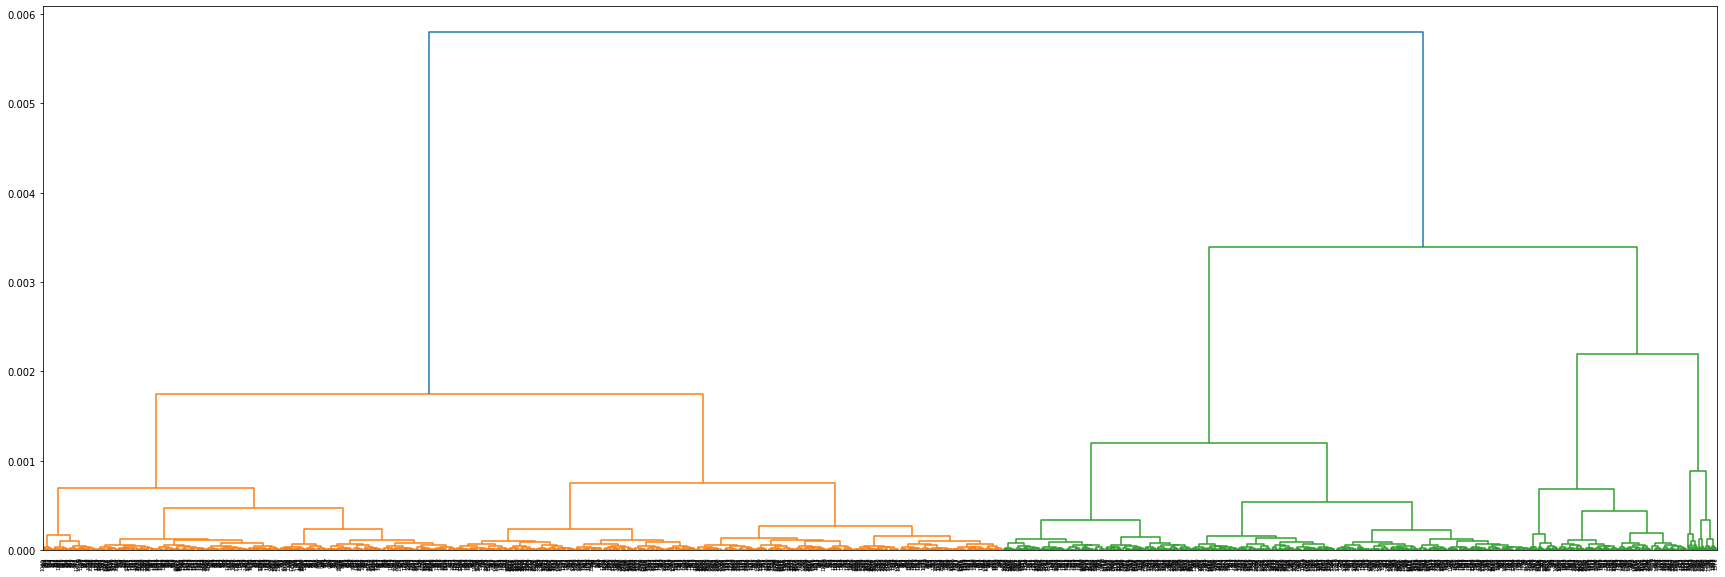

In [46]:
plt.figure(figsize=(30,10))
dendrogram1 = sch.dendrogram(sch.linkage(data_norm, method='ward'))

* Seeing at the dendogram and kneed package we can select number of clusters as 3

In [47]:
hc4 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
hc4.fit(data_norm)

AgglomerativeClustering(n_clusters=3)

In [48]:
#saving the clusters 
y_hc4 = hc4.fit_predict(data_norm)
y_hc4

array([0, 1, 0, ..., 2, 1, 2])

In [49]:
#adding the clusters to the dataframe
data['cluster_hc4'] = y_hc4
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_hc,cluster_hc2,cluster_hc3,cluster_hc4
ID,,,,,,,,,,,
100001267,0,0,45,1,136129,1,1,1,3,0,0
100001911,1,1,24,1,84228,0,0,1,3,0,1
100001910,1,1,26,1,80540,0,0,1,3,0,0
100001909,1,1,28,1,88858,0,0,1,3,0,1
100001922,1,1,26,1,69333,0,0,1,3,0,2


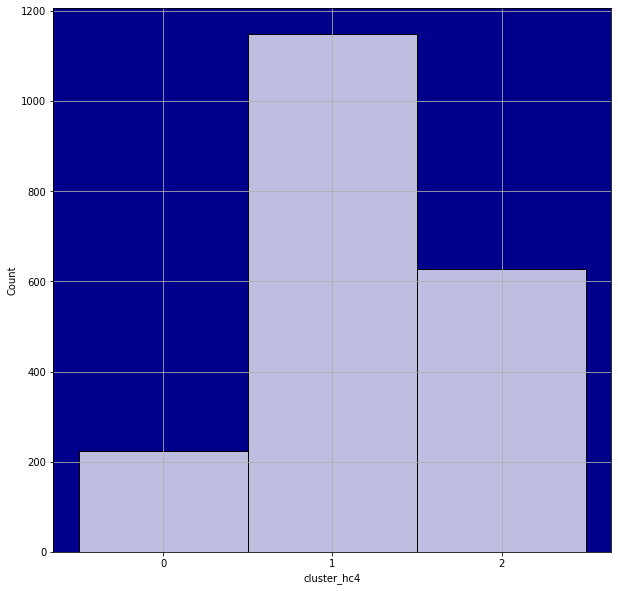

In [50]:
data['cluster_hc4'] = y_hc4
data.cluster_hc4 = data.cluster_hc4.astype(str)
data = data.sort_values("cluster_hc4")

plt.figure(figsize=(10,10))
plt.axes(facecolor='darkblue')
sns.histplot(data.cluster_hc4, color = "white")
plt.grid()
plt.show()

In [51]:
score4 = silhouette_score(data_norm, hc4.labels_, random_state=0)
score4

0.5331360237667163

* 0.5331 indicate that samples are closer to their clusters than they are to other clusters.

In [52]:
#number of datapoints for each clusters
data['cluster_hc4'].value_counts()

1    1148
2     628
0     224
Name: cluster_hc4, dtype: int64

In [53]:
df1_clustered4 = data.sort_values("cluster_hc4")
df1_clustered4.iloc[:,[-1]]

,cluster_hc4
ID,
100001267,0
100001176,0
100001835,0
100001354,0
100001212,0
...,...
100001715,2
100001798,2
100000501,2


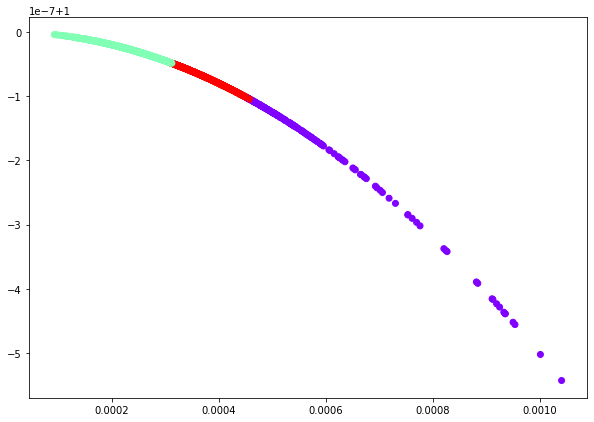

In [54]:
plt.figure(figsize=(10,7))
plt.scatter(data_norm['Age'],data_norm['Income'],c=hc4.labels_,cmap='rainbow')

## Pros of Average Linkage :

* In many cases, Ward’s Linkage is preferred as it usually produces better cluster hierarchies.
* Ward’s method is less susceptible to noise and outliers.

## Cons of Ward's Linkage :

* Ward’s linkage method is biased towards globular clusters.

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> All distance wise scores for all the Linkage Methods  </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div>

In [55]:
new_data = df.copy()
new_data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [56]:
## function to compute scores for all permutations
def s_score(distance, linkage):
    agc = AgglomerativeClustering(n_clusters=3, affinity=distance, linkage=linkage)
    agc.fit_predict(new_data)
    score = silhouette_score(new_data, agc.labels_, random_state=0)
    return score

In [57]:
distances = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']

In [58]:
scoring = {'dist':[], 'link':[], 'sScore':[]}
for i in distances:
    for j in linkages:
        try:
            score = s_score(i, j)
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(score)
        except:
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(np.nan)
scoringDf = pd.DataFrame(scoring)

In [59]:
scoringDf.dropna(axis=0, inplace=True)
scoringDf

,dist,link,sScore
0,euclidean,ward,0.528529
1,euclidean,complete,0.458238
2,euclidean,average,0.570893
3,euclidean,single,0.727572
5,manhattan,complete,0.460008
6,manhattan,average,0.617315
7,manhattan,single,0.727572
9,cosine,complete,0.019916
10,cosine,average,0.002738
11,cosine,single,0.240026


In [60]:
final_result = scoringDf[scoringDf['sScore'] == max(scoringDf['sScore'])]
final_result

,dist,link,sScore
3,euclidean,single,0.727572
7,manhattan,single,0.727572


## At last :

* Use of "Single-linkage" method having a minimum of the distances between all observations of the sets. This linkage produces the best result with all the distance methods.
* We produce a silhouette score of 0.7038, the score looks good.
* This dataset containing information about 2000 customers has been classified into 4 clusters or segments.

<div align="center" style="color:white;
           background-color:#6699C2;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Advantages and Disadvantages of Agglomerative Hierarchical Clustering Algorithm</center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div> 

### Advantages

* The agglomerative technique is easy to implement.
* It can produce an ordering of objects, which may be informative for the display.
* In agglomerative Clustering, there is no need to pre-specify the number of clusters.
* By the Agglomerative Clustering approach, smaller clusters will be created, which may discover similarities in data.

### Disadvantages

* The agglomerative technique gives the best result in some cases only.
* The algorithm can never undo what was done previously, which means if the objects may have been incorrectly grouped at an earlier stage, and the same result should be close to ensure it.
* The usage of various distance metrics for measuring distances between the clusters may produce different results. So performing multiple experiments and then comparing the result is recommended to help the actual results’ veracity.

In [61]:
#comparing the clusters from various methods
hc1 = data["cluster_hc"]
hc2 = data["cluster_hc2"]
hc3 = data["cluster_hc3"]
hc4 = data["cluster_hc4"]
final = pd.concat([hc1,hc2,hc3,hc4], axis=1)
final

,cluster_hc,cluster_hc2,cluster_hc3,cluster_hc4
ID,,,,
100001267,1,3,0,0
100000752,1,3,0,0
100001843,1,3,0,0
100000379,1,0,0,0
100000682,1,3,0,0
...,...,...,...,...
100001676,1,0,0,2
100001639,1,3,0,2
100001206,1,3,0,2


<div align="center" style="color:white;
           background-color:#852332FF;
           font-size:15px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
     <center> Check PART 2 : Clustering with K-Means </center>
<p style="padding: 5px;color:white;"> 
    </p>    
</div> 

<div align="center" style="color:white;
           background-color:#16507F;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px"> 
   <center>⪻◥◤◢◣⚜Thank You⚜◥◤◢◣⪼</center>
<p style="padding: 5px;color:white;">
     </p> 
</div>